<a href="https://colab.research.google.com/github/jonatahpfg/Trabalho-ICD/blob/main/Projeto_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("rock_spotify.csv", error_bad_lines=False)
dfalbum = pd.read_csv("albumlist.csv", encoding='latin1')


A seguir será feita uma análise da quantidade de álbums por ano, entre os 500 melhores(segundo a Revista Rolling Stone.

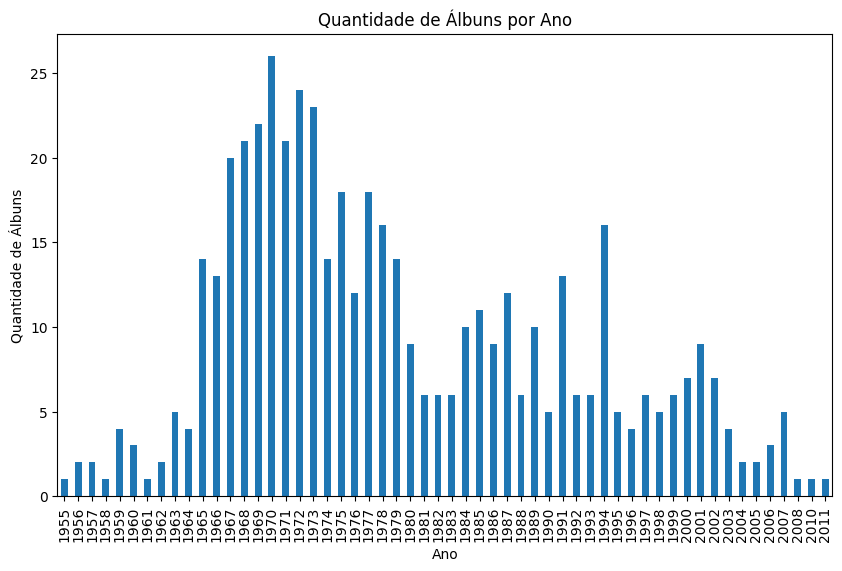

In [ ]:
album_por_ano = dfalbum.groupby('Year')['Album'].count()

# Cria o gráfico de barras
album_por_ano.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de Álbuns por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Álbuns')
plt.show()





Percebe-se um crescimento anormal a partir de 1965, o que será que pode explicar isso? Faremos uma análise de dois períodos, primeiramente de 1965 a 1980 e depois de 1955 para 1964.

Rock                            60.350877
Funk / Soul                     10.877193
Rock, Blues                      3.859649
Rock, Pop                        3.157895
Electronic, Rock                 2.807018
Rock, Folk, World, & Country     2.105263
Folk, World, & Country           1.754386
Reggae                           1.754386
Rock, Funk / Soul                1.403509
Blues                            1.052632
Name: Genre, dtype: float64

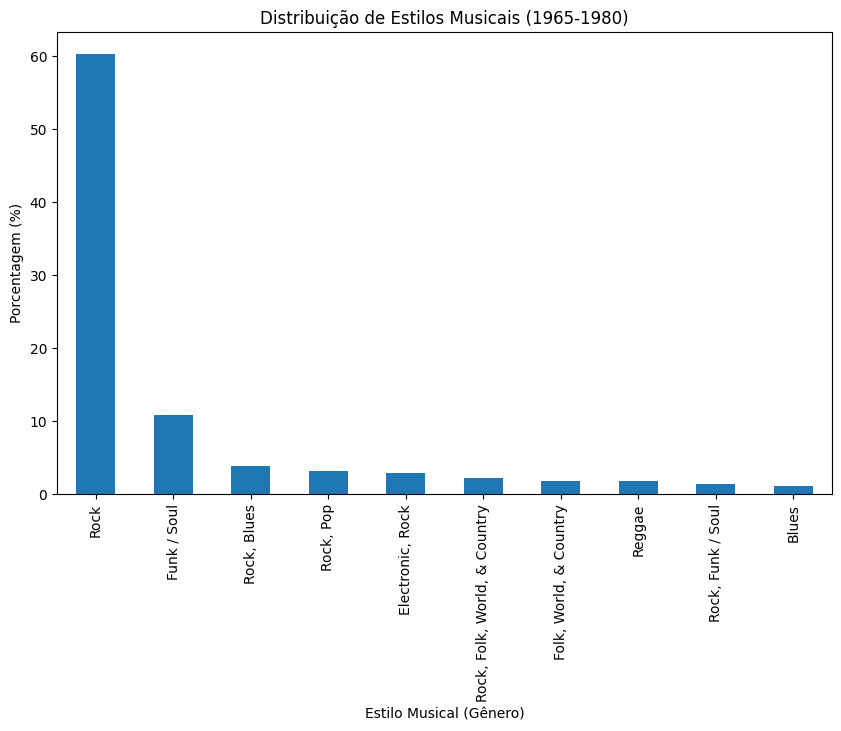

In [ ]:
dfalbum_filtro_tempo = dfalbum[(dfalbum['Year'] >= 1965) & (dfalbum['Year'] <= 1980)]
generos_desejados = ['Rock','Jazz', 'Pop', 'Blues', 'Folk']

# Filtra o DataFrame apenas para os gêneros desejados
df_generos_desejados = dfalbum_filtro_tempo[dfalbum_filtro_tempo['Genre'].isin(generos_desejados)]

genero_contagem = dfalbum_filtro_tempo['Genre'].value_counts()

# Calcula a porcentagem de cada estilo musical em relação ao total de ocorrências
total_ocorrencias = genero_contagem.sum()
genero_porcentagem = (genero_contagem / total_ocorrencias) * 100

# Seleciona os 10 estilos musicais mais frequentes
n = 10
genero_porcentagem = genero_porcentagem.head(n)

display(genero_porcentagem)
# Cria o gráfico de barras com as porcentagens
genero_porcentagem.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Estilos Musicais (1965-1980)')
plt.xlabel('Estilo Musical (Gênero)')
plt.ylabel('Porcentagem (%)')
plt.show()

Agora faremos a mesma coisa para o período entre 1955 e 1964 

Jazz                                   20.0
Rock                                   12.0
Jazz, Pop                              12.0
Blues                                  12.0
Rock, Blues                             8.0
Funk / Soul, Blues                      8.0
Rock, Pop                               8.0
Funk / Soul                             4.0
Folk, World, & Country                  4.0
Funk / Soul, Folk, World, & Country     4.0
Name: Genre, dtype: float64

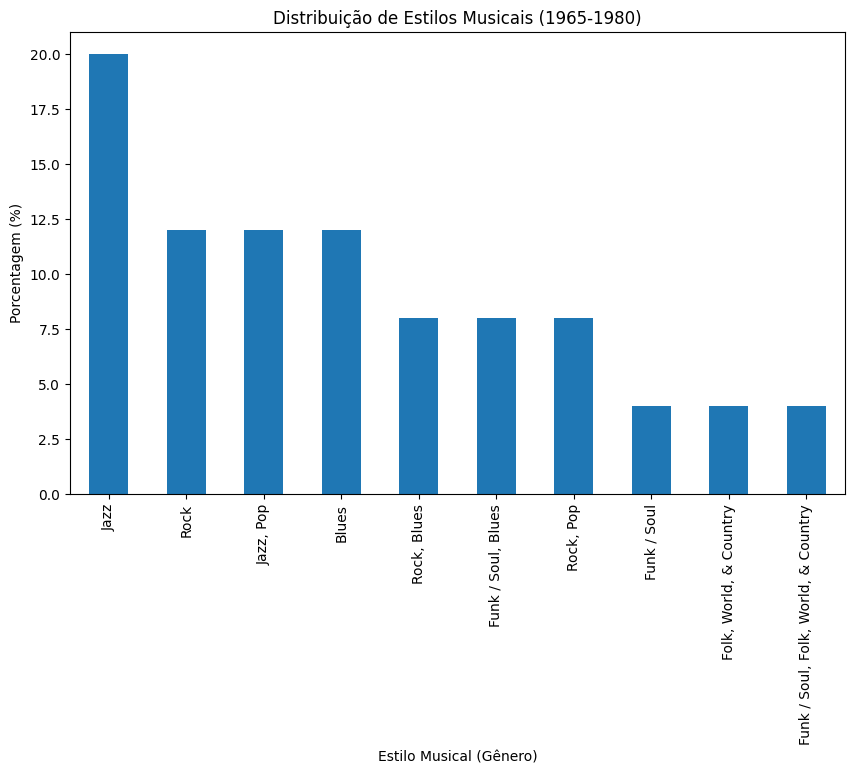

In [ ]:
dfalbum_filtro_tempo = dfalbum[(dfalbum['Year'] >= 1955) & (dfalbum['Year'] <= 1964)]
generos_desejados = ['Rock','Jazz', 'Pop', 'Blues', 'Folk']

# Filtra o DataFrame apenas para os gêneros desejados
df_generos_desejados = dfalbum_filtro_tempo[dfalbum_filtro_tempo['Genre'].isin(generos_desejados)]

genero_contagem = dfalbum_filtro_tempo['Genre'].value_counts()

# Calcula a porcentagem de cada estilo musical em relação ao total de ocorrências
total_ocorrencias = genero_contagem.sum()
genero_porcentagem = (genero_contagem / total_ocorrencias) * 100

# Seleciona os 10 estilos musicais mais frequentes
n = 10
genero_porcentagem = genero_porcentagem.head(n)

display(genero_porcentagem)
# Cria o gráfico de barras com as porcentagens
genero_porcentagem.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Estilos Musicais (1965-1980)')
plt.xlabel('Estilo Musical (Gênero)')
plt.ylabel('Porcentagem (%)')
plt.show()

A década de 70 e 80 foram períodos em que a indústria fonográfica estava em
pleno desenvolvimento, com o lançamento de muitos álbuns icônicos e a consolidação de várias gravadoras e selos musicais. Essas décadas também foram marcadas por eventos culturais e sociais significativos, como o movimento pelos direitos civis e a revolução tecnológica, que influenciaram a música e a produção de discos. Portanto, a presença de muitos discos das décadas de 70 e 80 na lista dos 500 melhores discos da Rolling Stone pode ser atribuída a uma combinação de fatores históricos, culturais e musicais que tornaram essas décadas particularmente ricas em termos de produção musical e influência cultural. Ou seja, torna-se evidente através dos gráficos que os discos deram um "Boom" próximo dos anos 70, com o surgimento de vários gêneros e estilos musicais que tiveram um impacto duradouro na indústria musical e na cultura popular.

Agora vamos fazer uma análise referente a proporcionalidade entre a quantidade de discos de cada artista entre os 500 melhores e a popularidade de algumas de suas músicas

Então vamos ver a média de popularidade dos artistas com álbuns entre os 500 melhores no dataset com músicas gerais, limitando para aqueles que possuem pelo menos 5 músicas no arquivo.

In [ ]:
artistas_discos = dfalbum['Artist'].unique()

df_musicas_artistas_presentes = df[df['artist'].isin(artistas_discos)]

contagem_musicas_por_artista = df_musicas_artistas_presentes.groupby('artist').size()

# Filtrar apenas os artistas que possuam pelo menos 5 músicas
artistas_com_minimo_musicas = contagem_musicas_por_artista[contagem_musicas_por_artista >= 6 ]

# Filtrar o dataset de músicas para incluir somente os artistas com pelo menos 6 músicas
df_musicas_artistas_presentes_filtrado = df_musicas_artistas_presentes[df_musicas_artistas_presentes['artist'].isin(artistas_com_minimo_musicas.index)]

# Calcular a média de popularidade de cada artista
media_popularidade_por_artista = df_musicas_artistas_presentes_filtrado.groupby('artist')['popularity'].mean()

# Ordenar a média de popularidade por artista em ordem decrescente
media_popularidade_por_artista = media_popularidade_por_artista.sort_values(ascending=False)

# Exibir a média de popularidade de cada artista ordenada
print(media_popularidade_por_artista)


artist
Bob Marley & The Wailers    69.625000
Coldplay                    67.529412
Red Hot Chili Peppers       66.130435
Michael Jackson             66.000000
Fleetwood Mac               65.850000
                              ...    
The White Stripes           41.777778
Stevie Wonder               41.400000
Oasis                       38.800000
Buddy Holly                 31.555556
Various Artists             29.293578
Name: popularity, Length: 88, dtype: float64


Agora vamos categorizar quantos álbuns cada artista possui no dataset, gerando um gráfico.

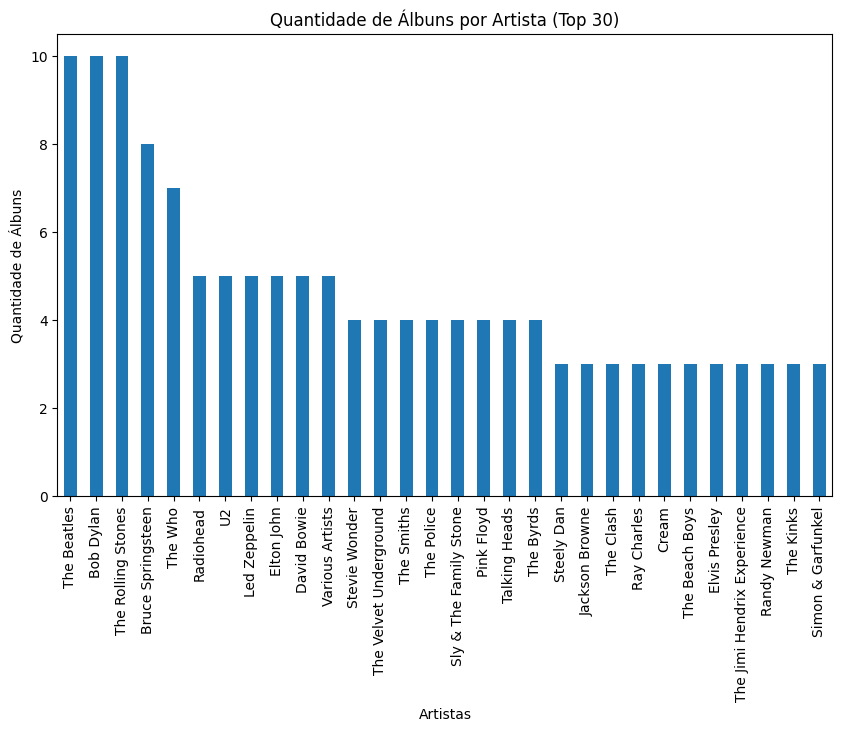

In [ ]:
#Neste pedaço basicamento separamos a quantidade de álbum
album_por_artista = dfalbum.groupby('Artist')['Album'].count()

album_por_artista = album_por_artista.sort_values(ascending=False)
n_artistas = 30 
album_por_artista_limitado = album_por_artista.head(n_artistas)

album_por_artista_limitado.plot(kind='bar', figsize=(10, 6))
plt.title(f'Quantidade de Álbuns por Artista (Top {n_artistas})')
plt.xlabel('Artistas')
plt.ylabel('Quantidade de Álbuns')
plt.show()



Com essas informações vamos verificar se a quantidade de álbuns entre os 500 melhores é proporcional a popularidade


In [ ]:

df_popularidade_media = df.groupby('artist')['popularity'].mean().sort_values(ascending=False)


artistas_com_mais_de_5_musicas = df['artist'].value_counts()[df['artist'].value_counts() > 5].index

df_popularidade_media_filtrada = df_popularidade_media[df_popularidade_media.index.isin(artistas_com_mais_de_5_musicas)]

df_popularidade_media_filtrada = df_popularidade_media_filtrada[df_popularidade_media_filtrada > 30]

df_unido = pd.DataFrame({'Artist': df_popularidade_media_filtrada.index, 'popularity': df_popularidade_media_filtrada.values})


df_unido = df_unido.merge(df_album_por_artista, on='Artist', how='left')

df_unido = df_unido.drop(['level_0', 'index'], axis=1)

print("\nUnião da média de popularidade com a quantidade de álbuns por artista:")
display(df_unido)


União da média de popularidade com a quantidade de álbuns por artista:


,Artist,popularity,Album
0,My Chemical Romance,71.833333,NaN
1,System Of A Down,70.875000,NaN
2,Bob Marley & The Wailers,69.625000,3.0
3,Linkin Park,69.235294,NaN
4,Coldplay,67.529412,1.0
...,...,...,...
203,The Living End,33.833333,NaN
204,Manic Street Preachers,33.333333,NaN
205,Elbow,32.250000,NaN
206,Buddy Holly,31.555556,1.0


In [4]:
print("teste")

teste
